# Linear Combination of Functions

Adaline stands for **ADA**ptive **LI**near **E**lement. It was proposed in the context of filtering and is an early single-layer artificial neural network. The difference between Adaline and the Perceptron is that in the learning phase, the weights are adjusted according to the weighted sum of the inputs. Check out the [original paper](https://www-isl.stanford.edu/~widrow/papers/c1960adaptiveswitching.pdf).

In this notebook we will show how Adaline can approximate the parameters of a linear combination of non-linear functions.

### References

- BRAGA, A.; CARVALHO, A. C. P. L. F.; LUDERMIR, T. B. (2011) Redes Neurais Artificiais – Teoria e Prática. Editora LTC, Section 3.3
- WIDROW, B.; HOFF, M. E. (1960) _Adaptive Switching Circuits_, IRE WESCON Convention Record, pp. 96-104.

### Implementation

- Elloá B. Guedes (ebgcosta@uea.edu.br)
- [github.com/elloa](github.com/elloa)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Functions

- $x \in [0, 2 \pi]$
- $f_1(x) = \sin(x)$
- $f_2(x) = \cos(x)$
- $f_3(x) = x$
- $F(x) = - \pi + 0.565f_1(x) + 2.657f_2(x) + 0.674f_3(x)$

Thus, we have:

- $a_0 = - \pi \approx 3.1415$
- $a_1 = 0.565$
- $a_2 = 2.657$
- $a_3 = 0.674$

In [17]:
def F(x):
    return - np.pi + 0.565*np.sin(x) + 2.657*np.cos(x) + 0.674*x

In [18]:
# Colors
c1 = (0.0, 0.58, 0.71)
c2 = (0.0, 0.53, 0.74)
c3 = (0.4, 0.6, 0.8)
c4 = (0.16, 0.32, 0.75)
c5 = (0.44, 0.16, 0.39)

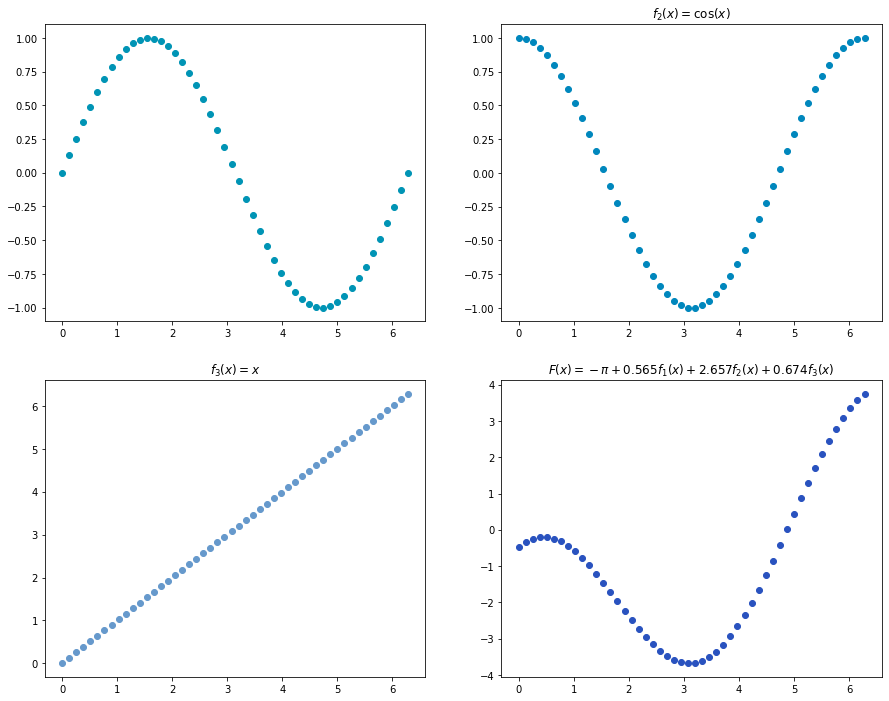

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))
x = np.linspace(0, 2 * np.pi, 50)
ax1.plot(x, np.sin(x), 'o', color = c1)
ax2.plot(x, np.cos(x), 'o', color = c2)
ax2.set_title(r"$f_2(x) =\cos(x)$");
ax3.plot(x, x, 'o', color = c3)
ax3.set_title(r"$f_3(x) = x$");
ax4.plot(x, F(x), 'o', color = c4)
ax4.set_title(r"$F(x) = - \pi + 0.565f_1(x) + 2.657f_2(x) + 0.674f_3(x)$");

## Let's sample 30 random points: (x,F(x))

In [20]:
points = np.asarray([random.uniform(0, 2*np.pi) for x in range(30)])
outputs = np.asarray(F(points))

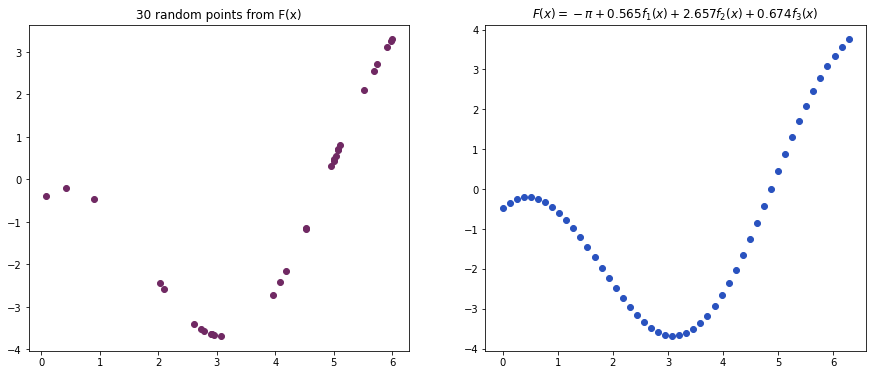

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.plot(points, outputs, 'o', color = c5);
ax1.set_title("30 random points from F(x)");
ax2.plot(x, F(x), 'o', color = c4)
ax2.set_title(r"$F(x) = - \pi + 0.565f_1(x) + 2.657f_2(x) + 0.674f_3(x)$");

## ADALINE to approximate F(x)

- Strategy: use 30 sample points to train Adaline
- Weight vector to approximate $(a_0, a_1, a_2, a_3)$, i.e.: $$(w_0 = \theta, w_1, w_2, w_3) \approx  (a_0, a_1, a_2, a_3)$$
- Initial weights: $w_i \sim U(-0.5;0.5)$

## Train Data

- For the 30 sample points obtain the following vectors:
$$(a_0 = 1, a_1 = \sin(x), a_2 = \cos(x), a_3 = x)$$
- Target: $F(x)$

In [22]:
## ADALINE elements

# Outputs the weighted-sum of inputs
# Activation function is purelin, i.e., f(u) = u
def output(weights,sample):
    return np.sum(np.dot(weights,sample))

# Error
def error(target,obtained):
    return target - obtained

# Mean Squared Error for the entire dataset
def mse(targets,inputs, weights):
    temp = []
    for i in range(len(inputs)):
        temp.append(output(weights,inputs[i]))
        
    s = 0
    for (x,y) in zip(targets,temp):
        s += (x-y)**2
    return s/len(targets)

In [23]:
s = []
for p in points:
    s.append([+1,np.sin(p),np.cos(p),p])
inputs = np.asarray(s)
targets = outputs
SAMPLES = 30
LEARNING_RATE = 0.01

In [24]:
# Initial weight vector
w0 = np.array([random.uniform(-0.5, 0.5) for x in range(4)])

it = 0
pos = 0
w0 = np.squeeze(w0)

In [25]:
print("Initial weight vector w(0): ",w0)

Initial weight vector w(0):  [-0.44683361 -0.09874684 -0.23713679  0.17524504]


## ADALINE Learning Algorithm

In [26]:
values = []
errors = []
while (mse(targets,inputs,w0) > 10**(-8)):
    iteration_error = error(targets[pos],output(w0,inputs[pos]))
    
    ## Creating a list of weights and MSE at the current iteration    
    #values.append(np.concatenate((w0, np.array(mse(targets,inputs,w0), dtype=np.float32))))
    
    #errors.append(mse(targets,inputs,w0)[0])
    w1 = w0 + LEARNING_RATE*iteration_error*inputs[pos]    
    w1 = w1.squeeze()
    
    ## iteration over the 30 input samples
    pos = pos + 1
    if pos == SAMPLES:
        pos = 0
        
        
    w0 = w1
    it = it + 1 
        
print("====== TRAINING RESULT ======")
print("Iterations: ",it)
print("Epochs: ",int(it/30))
print("Final weights vector:")
print(w0)

====== TRAINING RESULT ======
Iterations:  12538
Epochs:  417
Final weights vector:
[-3.14128007  0.56480853  2.65702909  0.67390772]


In [27]:
def approximation(w0,x):
    return w0[0] + w0[1]*np.sin(x) + w0[2]*np.cos(x) + w0[3]*x

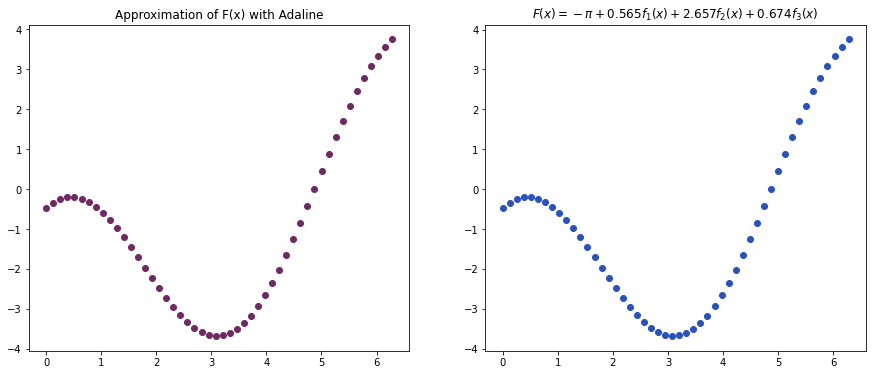

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.plot(x, approximation(w0,x), 'o', color = c5);
ax1.set_title("Approximation of F(x) with Adaline");
ax2.plot(x, F(x), 'o', color = c4)
ax2.set_title(r"$F(x) = - \pi + 0.565f_1(x) + 2.657f_2(x) + 0.674f_3(x)$");

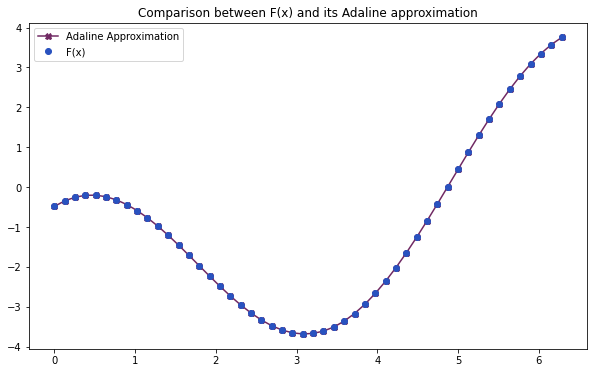

In [29]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(x, approximation(w0,x), 'X-', color = c5, label = "Adaline Approximation");
ax1.plot(x, F(x), 'o', color = c4, label = "F(x)")
ax1.set_title(r"Comparison between F(x) and its Adaline approximation");
ax1.legend();

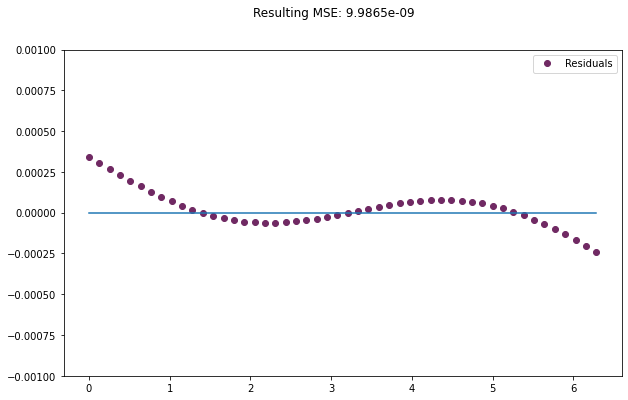

In [30]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(x, approximation(w0,x) - F(x), 'o', color = c5, label = "Residuals");
ax1.plot(x,[0]*50)
ax1.set_ylim([-0.001, 0.001])
fig.suptitle("Resulting MSE: {:g}".format(mse(targets,inputs,w0)))
ax1.legend();